<a href="https://colab.research.google.com/github/MamatkulovBunyodbek1999/MatPlotLib/blob/main/04_VISUAL_AMALIYOT_4-SUBPLOT_USING%20GROUPBY_METHOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 4-MODUL. VIZUALIZASIYA

## 4-AMALIYOT. Distribution


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Ushbu amaliyotda uybor.uz saytidan yuklab olingan ma'lumotlar tahlili bilan shu'gullanamiz.

In [24]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/blob/main/uybor_scrapping.csv?raw=true")
df.head()

,location,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000,41.300156,69.210831


#### Yuqoridagi jadvalda Toshkent shahridagi sotildagian uylar haqida ma'lumotlar jamlangan.

## 1-VAZIFA. Jadvaldan xonalari 5 xonadan ko'p bo'lgan, narxi 200000 mingdan, maydoni 250kv.m dan ortiq bo'lgan uylarni tashlab yuboring

In [25]:
#JAVOBINGIZNI SHUYERGA YOZING
df1=df[df['rooms']<6]

In [26]:
df2=df1[df1['price']<=200000]


In [27]:
df3=df2[df2['size']<=250]


In [28]:
df3.shape

(7223, 9)

In [29]:
#@title Natija
df=df[df['rooms']<6]
df=df[df['size']<250]
df=df[df['price']<200000]
df.shape

(7216, 9)

## 2-VAZIFA. `subplot` yordamida uylarning narxi va xonalar soni taqsimoti grafiklarini yonma yon chizing

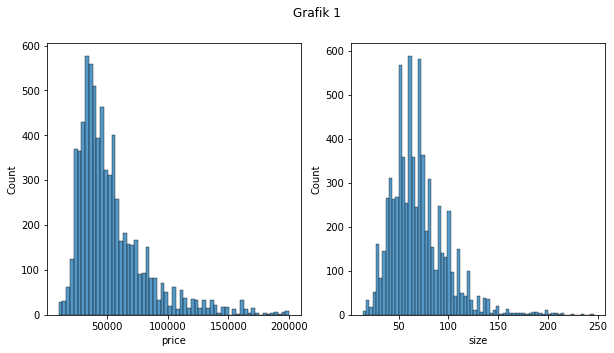

In [36]:
#JAVOBINGIZNI SHUYERGA YOZING
fig, ax = plt.subplots(1, 2, figsize=(10,5))
# Umumiy chizma nomini beramiz:
fig.suptitle("Grafik 1")
sns.histplot(ax=ax[0], data=df3, x='price')
sns.histplot(ax=ax[1], data=df3, x=df3['size'])


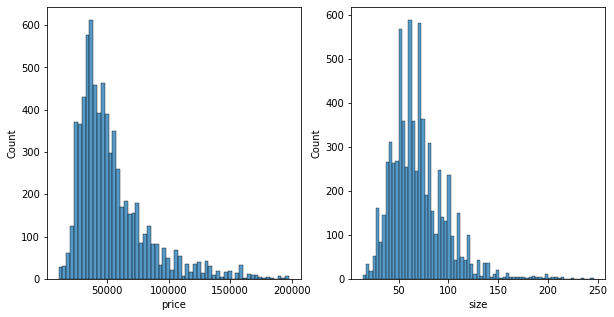

In [ ]:
#@title Kutilgan natija
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='price')
plt.subplot(1,2,2)
sns.histplot(data=df, x='size')
plt.show()

### 2-VAZIFA. Uylarning narxi taqsimoti va narx va maydoni o'rtasidagi bog'liqlik grafiklarini bitta chizmada ustma ust chiqaring.

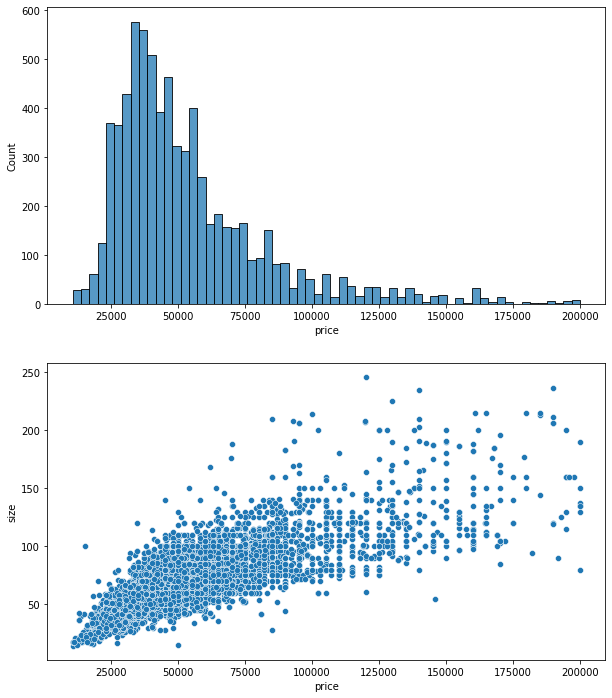

In [41]:
# JAVOB UCHUN JOY
fig, ax=plt.subplots(2,1, figsize=(10,12))
sns.histplot(ax=ax[0], data=df3, x='price')
sns.scatterplot(ax=ax[1], data=df3, x='price', y='size')
plt.show()

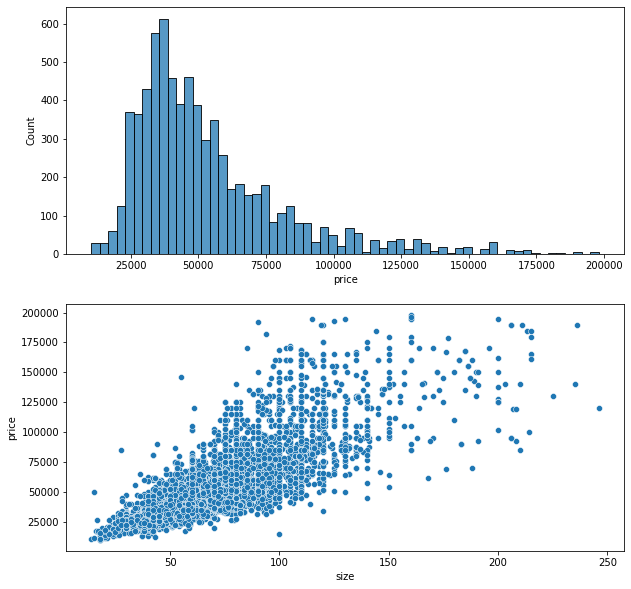

In [ ]:
#@title Kutilgan natija
fig, ax = plt.subplots(2, 1, figsize=(10,10))
# Umumiy chizma nomini beramiz:
sns.histplot(ax=ax[0], data=df, x='price')
sns.scatterplot(ax=ax[1], data=df, x=df['size'], y=df['price'])
plt.show()

### 3-VAZIFA. Quyidagi grafikni chizing. Ahamiyat bering, oxirgi grafikda tumanlar bo'yicha uylarning o'rtacha narxi tasvirlangan.

In [43]:
df3.head()

,location,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000,41.300156,69.210831


In [47]:
# JAVOB UCHUN JOY


# USING GROUPBY METHOD TO GET MEAN PRICE FOR EACH DIRSTRICT

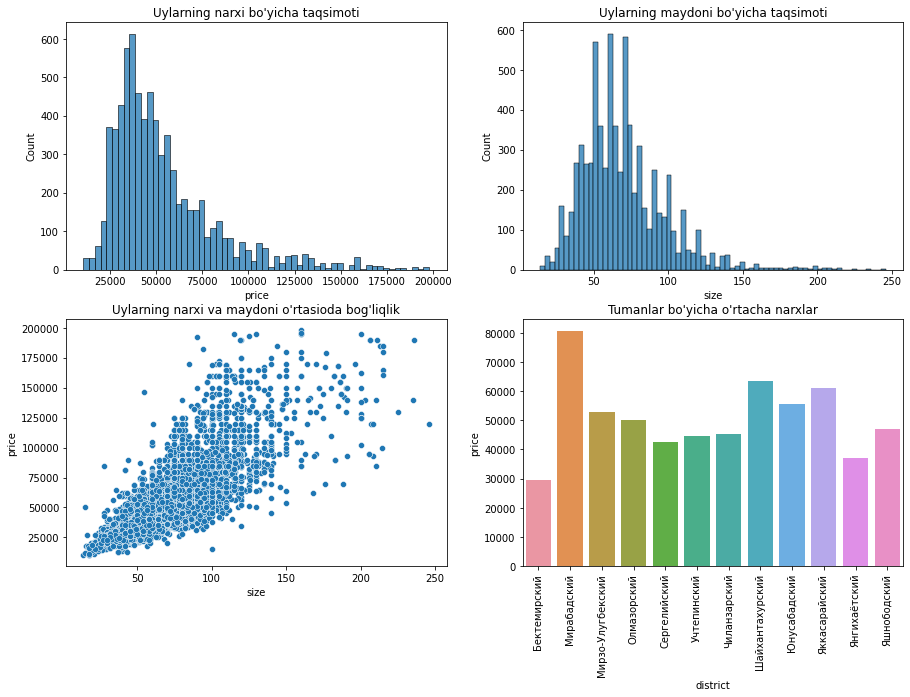

In [ ]:
#@title Kutilgan natija

# Tumanlar bo'yicha jamlangan df
distdf = df.groupby('district').mean() 

#Grafiklarni chizamiz
fig, ax = plt.subplots(2, 2, figsize=(15,10))
# Umumiy chizma nomini beramiz:
sns.histplot(ax=ax[0, 0], data=df, x='price')
sns.histplot(ax=ax[0, 1], data=df, x='size')
sns.scatterplot(ax=ax[1, 0], data=df, x=df['size'], y=df['price'])
sns.barplot(ax=ax[1, 1], x=distdf.index, y=distdf['price'])
# Har bir grafik uchun nom:
ax[0,0].set_title("Uylarning narxi bo'yicha taqsimoti")
ax[0,1].set_title("Uylarning maydoni bo'yicha taqsimoti")
ax[1,0].set_title("Uylarning narxi va maydoni o'rtasioda bog'liqlik")
ax[1,1].set_title("Tumanlar bo'yicha o'rtacha narxlar")
plt.xticks(rotation=90)
plt.show()

In [58]:
distdf = df3.groupby('district').mean() 

In [59]:
distdf

,rooms,size,level,max_levels,price,lat,lng
district,,,,,,,
Бектемирский,2.750000,62.525000,5.000000,6.250000,29462.500000,41.269078,69.306593
Мирабадский,2.866856,85.911232,4.419263,7.254958,80758.468839,41.292108,69.280130
Мирзо-Улугбекский,2.501124,68.165948,3.676404,5.710861,53059.402996,41.330476,69.333096
Олмазорский,2.693487,76.348161,3.482759,5.747126,50172.505747,41.342919,69.226783
Сергелийский,2.740260,74.046623,4.435065,7.435065,42607.376623,41.222111,69.237051
Учтепинский,2.659379,65.559045,3.554661,5.597238,44494.240506,41.288672,69.180468
Чиланзарский,2.339341,61.422039,3.269111,5.359229,45377.165942,41.277260,69.201484
Шайхантахурский,2.853521,79.416704,4.188732,6.830986,63386.025352,41.322853,69.233255
Юнусабадский,2.619385,71.584681,3.469267,5.682033,56261.554374,41.353166,69.287983
